<h1 align="center"> Clustering </h1>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [17]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

## Load Iris Dataset

In [18]:
# loading dataset into Pandas DataFrame
df = pd.read_csv('expression_data.csv')

In [19]:
display(df)

,Unnamed: 0,SPAC212.11,SPAC212.09c,SPAC212.04c,SPNCRNA.601,SPAC977.11,SPAC977.13c,SPAC977.15,SPAC977.16c,SPNCRNA.607,SPAC1F8.06
0,wt_0_r1,4.947329,5.443589,5.751174,5.731843,7.046601,5.335904,6.500652,7.237060,5.961123,6.640223
1,wt_0_r2,4.969572,6.205209,5.058125,4.868198,6.837324,5.339053,6.232901,7.457934,5.691651,6.651266
2,wt_0_r3,5.657995,6.172470,5.544557,4.936256,6.788719,5.310125,6.697946,7.475547,5.942602,6.777698
3,wt_15_r1,5.452545,5.943911,5.675589,5.569892,6.870560,5.319716,7.028231,7.088272,5.923746,4.616742
4,wt_15_r2,5.444799,6.333457,5.175381,5.319763,6.092104,5.988160,6.923664,7.461087,5.874517,5.607453
5,wt_15_r3,6.501252,6.405294,5.101433,4.198365,6.189225,5.295882,7.534349,7.646591,4.842055,6.149393
6,wt_30_r1,5.078831,6.711639,5.823344,5.168548,6.908198,7.606185,6.441425,6.878977,7.377979,5.655475
7,wt_30_r2,5.254861,7.146486,6.313480,4.772003,6.658501,7.483295,6.680045,7.131173,7.304704,6.497174
8,wt_30_r3,5.324121,6.932336,6.595747,5.078932,6.932336,7.142835,6.766412,7.632571,7.597660,6.441647
9,wt_60_r1,4.853563,6.790664,5.618074,5.399681,6.220495,5.742349,5.742349,6.535896,6.960366,6.655092


## Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it is necessary to standardize the data.

In [20]:
x = df.iloc[:, 1:]

In [21]:
#y = df.loc[:,['target']]

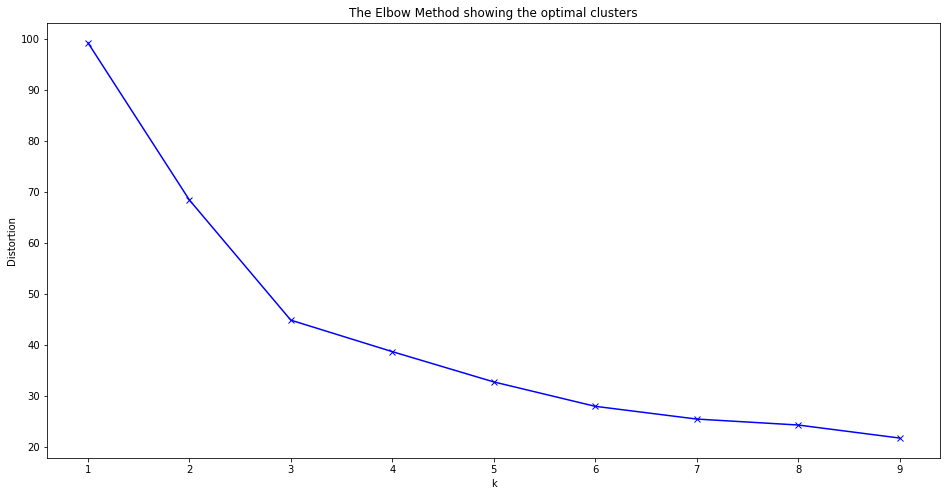

In [22]:
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 distortions.append(kmeanModel.inertia_)# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

## K-Means

In [23]:
kmeans_model = KMeans(n_clusters=4, n_jobs=3, random_state=32932)

In [24]:
prediction = kmeans_model.fit_predict(x)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [25]:
df['Cluster_Kmeans'] = prediction

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other? 

In [26]:
df[prediction == 0].iloc[:,1]

0     4.947329
1     4.969572
2     5.657995
18    4.847734
19    5.017982
20    4.854338
Name: SPAC212.11, dtype: float64

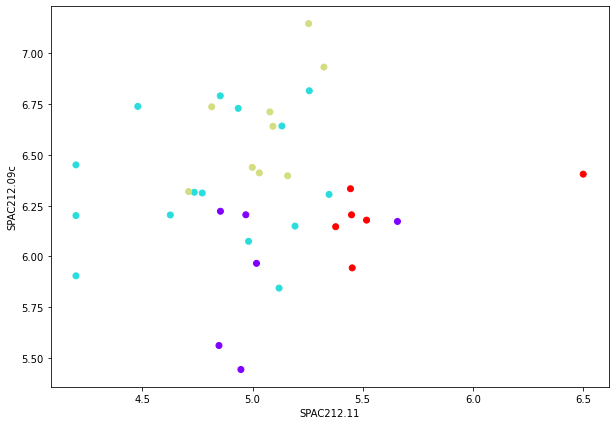

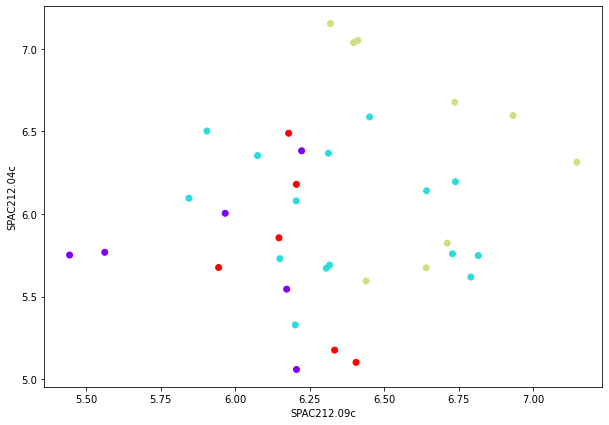

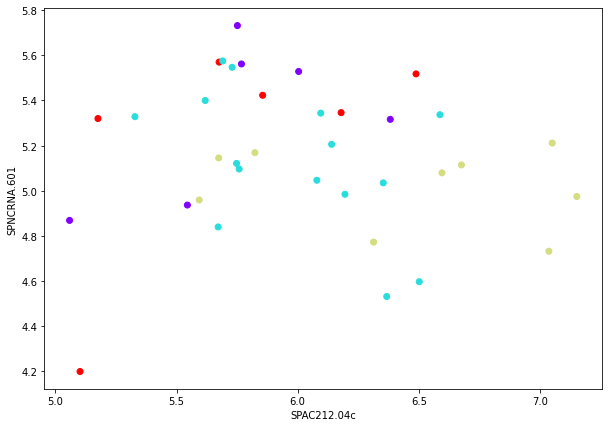

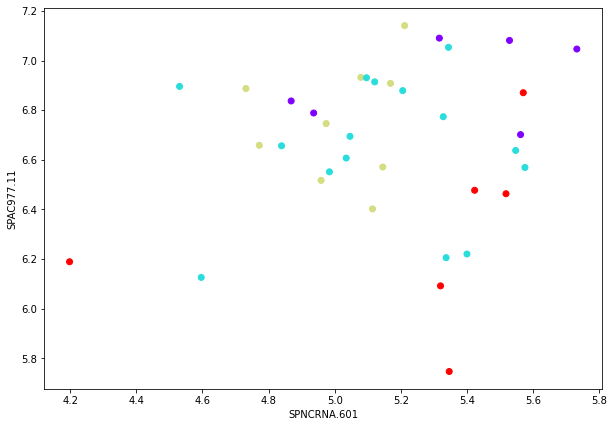

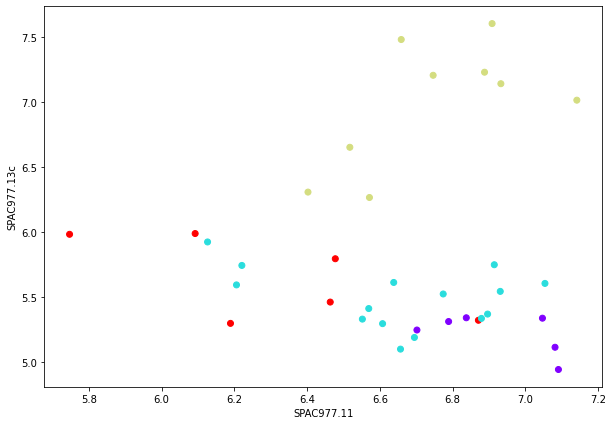

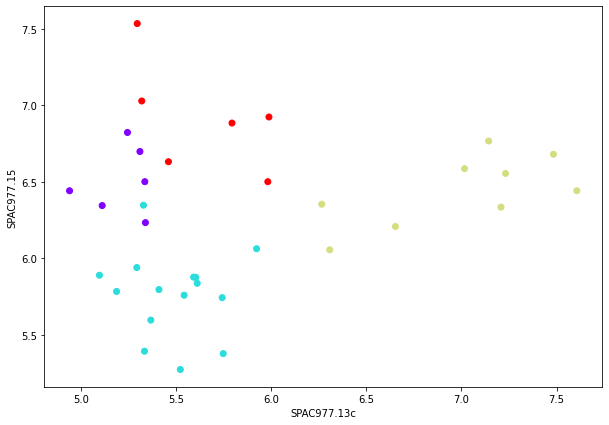

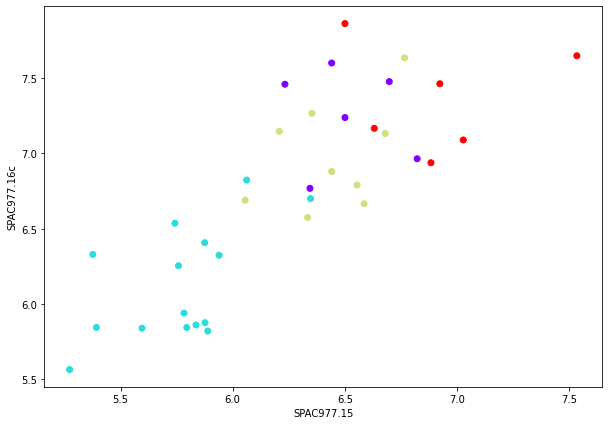

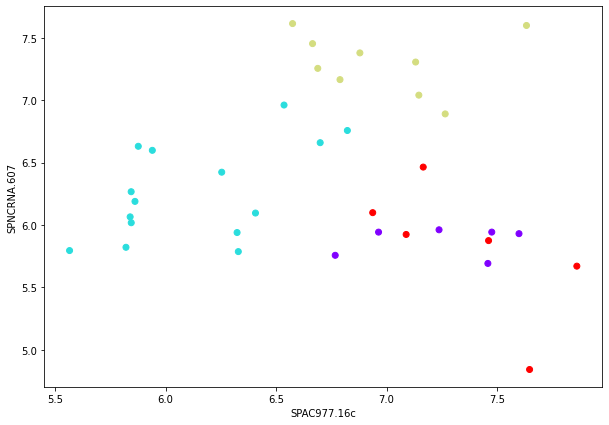

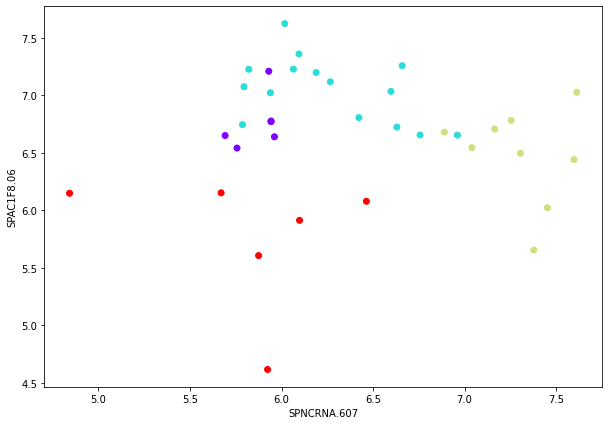

In [27]:
for k in range(1,10):
    plt.figure(figsize=(10, 7))
    plt.scatter(df.iloc[:,k], df.iloc[:,k+1], c=kmeans_model.labels_, cmap='rainbow')
    plt.xlabel(df.iloc[:,[k]].columns[0])
    plt.ylabel(df.iloc[:,[k+1]].columns[0])

## Hierarchical Clustering

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [28]:
agglomerative_model = AgglomerativeClustering(n_clusters = None, affinity='euclidean', linkage='ward',distance_threshold=0)
prediction = agglomerative_model.fit_predict(x)
df['Cluster_Ward'] = prediction

The first two principal components explain 95.80% of the observed variance (72.77% of the variance the first component and the s 23.03% the second component). The rest pricipal components contained the rest of the variance of the dataset. In conclusion, we can affirm that our new variables high porcentage of the variance, so we can use these new variables to describe our data without lose important information

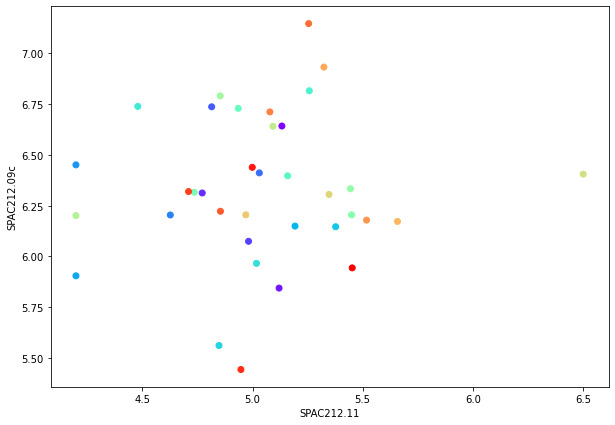

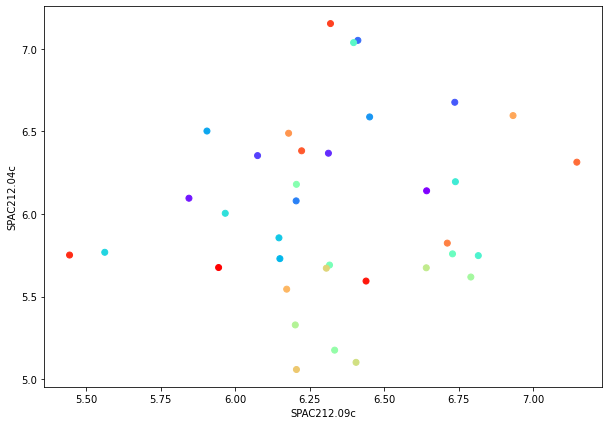

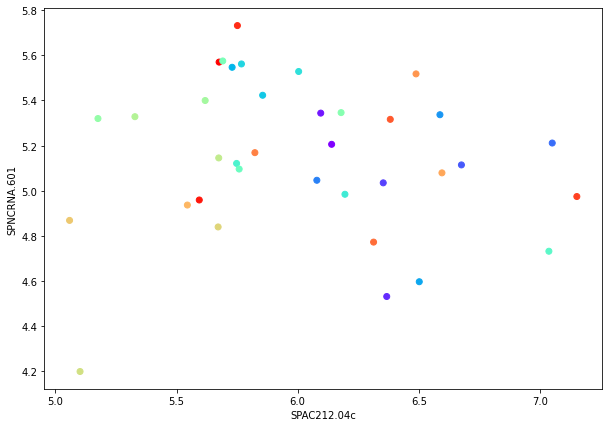

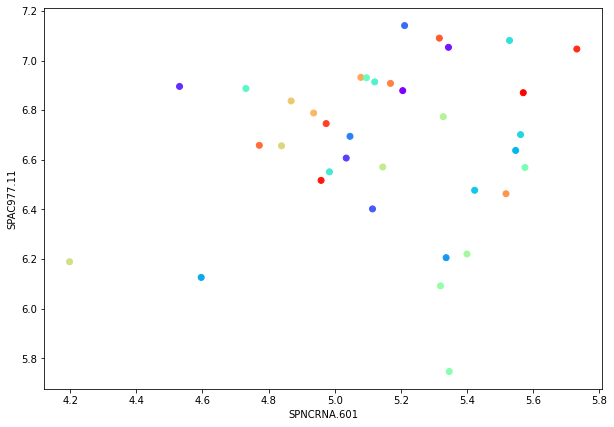

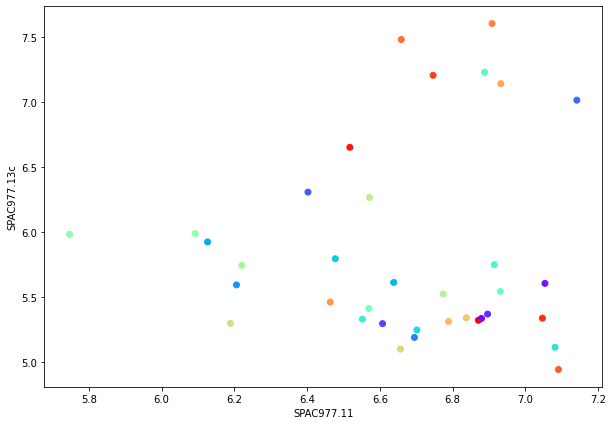

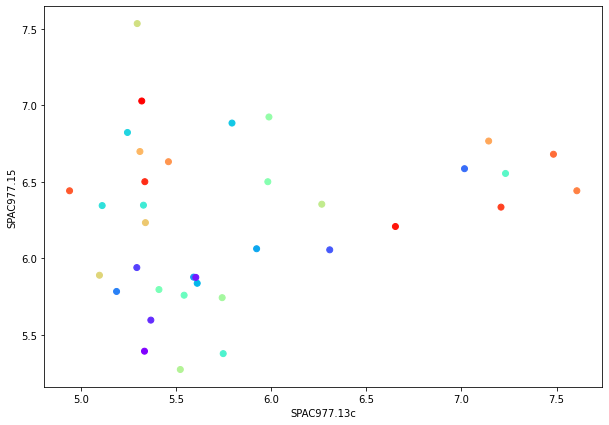

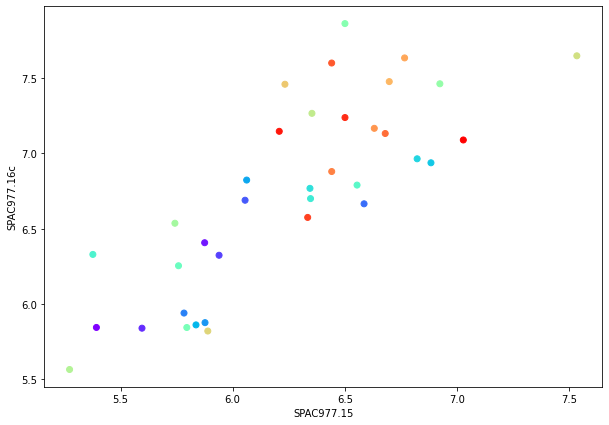

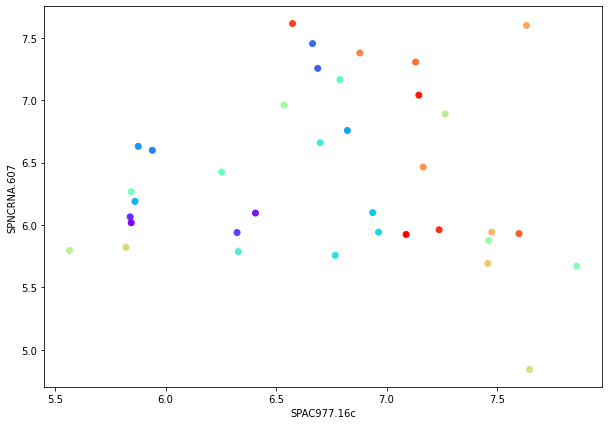

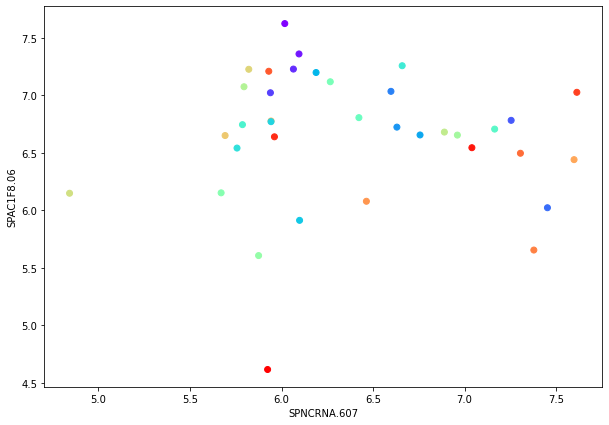

In [29]:
for k in range(1,10):
    plt.figure(figsize=(10, 7))
    plt.scatter(df.iloc[:,k], df.iloc[:,k+1], c=agglomerative_model.labels_, cmap='rainbow')
    plt.xlabel(df.iloc[:,[k]].columns[0])
    plt.ylabel(df.iloc[:,[k+1]].columns[0])

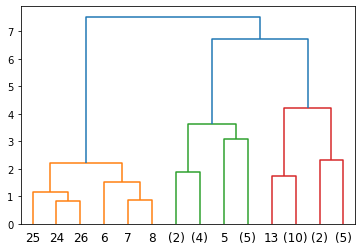

In [30]:
plot_dendrogram(agglomerative_model, truncate_mode="level", p=3)

## Limitations 

- PCA is not scale invariant. check: we need to scale our data first. 
- The directions with largest variance are assumed to be of the most interest 
- Only considers orthogonal transformations (rotations) of the original variables 
- PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not. 
- If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances. 